# Function Approximation using Fully Connected Neural Network

## Project Overview
This project implements a fully connected neural network for function approximation, where the model learns the relationship between input variables (x, y, z) and output function f(x,y,z). The network is trained to approximate the mathematical function: 

**f(x,y,z) = 3x²y³ - 4z²y² + 3yz**

## 🏗️ Architecture
The network uses a fully connected (dense) architecture with:

| Layer | Neurons | Activation | Purpose |
|-------|---------|------------|---------|
| Input | 3 | - | Receives (x, y, z) coordinates |
| Hidden 1 | 4 | ReLU | Feature transformation |
| Hidden 2 | 3 | ReLU | Non-linear mapping |
| Output | 1 | Linear | Regression output |

## 📊 Dataset
- **Type**: Synthetic dataset
- **Samples**: 400
- **Input Range**: Random integers [0, 20]
- **Target**: Polynomial function values

## 🔧 Implementation

### 1. Data Generation Function
```python
def data_generation(x,y,z):
    f = (3 * x**2 * y**3) - (4 * z**2 * y**2) + (3 * y * z)
    return f

In [57]:
def data_generation(x,y,z):
    f = (3 * x**2 * y**3) - (4 * z**2 * y**2) + (3 * y * z)
    return(f)

In [58]:
data_generation(2,1,2)

2

In [59]:
import torch

In [94]:
feature = torch.randint(low=0, high=20, size=(3,400)).float()

In [95]:
feature

tensor([[ 8.,  2.,  6.,  ..., 19., 12., 16.],
        [15.,  1., 13.,  ...,  0.,  6.,  4.],
        [ 3.,  7., 18.,  ...,  9., 18.,  3.]])

In [96]:
feature.shape

torch.Size([3, 400])

In [97]:
label= data_generation(feature[0,:], feature[1,:],feature[2,:]).float()

In [98]:
label

tensor([ 6.4004e+05, -1.6300e+02,  1.8954e+04,  1.0222e+06, -1.2520e+03,
         2.3207e+05, -6.7600e+02,  8.3678e+05,  2.0880e+06,  2.3364e+06,
        -1.2540e+03,  6.8400e+02,  2.8453e+05,  2.3600e+04,  5.9976e+04,
         1.8601e+05,  2.5920e+03,  3.5350e+06,  2.4300e+02,  3.1047e+06,
        -5.4894e+04,  3.9973e+06,  6.3200e+02,  4.6676e+05,  0.0000e+00,
         1.2992e+04,  1.9683e+04,  7.6172e+05, -1.8000e+02, -1.4139e+05,
         1.3531e+06,  9.6320e+04,  0.0000e+00,  1.4814e+06,  4.7254e+06,
         4.2215e+05, -3.6580e+03, -3.7363e+05,  1.1310e+05,  2.9453e+06,
         2.6972e+04,  1.8024e+04,  1.4744e+06, -1.2700e+03,  4.7890e+05,
         1.6969e+06, -3.9577e+05,  2.5105e+05,  1.3427e+06,  3.7319e+06,
         4.8380e+06, -3.1342e+05,  8.6349e+05,  5.6636e+06, -2.9430e+04,
         2.3904e+06,  1.7880e+04, -2.8354e+05,  1.1785e+06,  1.0070e+06,
         3.5300e+04,  0.0000e+00,  7.3232e+04,  1.1922e+06,  3.3322e+05,
         2.8544e+05, -1.1650e+03,  0.0000e+00,  4.1

In [100]:
feature[:,150]

tensor([19., 14., 12.])

In [101]:
label[150] 

tensor(2859360.)

In [103]:
data_generation(18,66,94)

125506260

In [104]:
import torch.nn as nn 
import torch.nn.functional as F

class Net_app(nn.Module):
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim):
        super(Net_app,self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden1_dim)
        self.hidden2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.output = nn.Linear(hidden2_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        return(x)

In [265]:
torch.manual_seed(42)
model = Net_app(3,4,3,1)

In [254]:
model.state_dict()

OrderedDict([('hidden1.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081]])),
             ('hidden1.bias', tensor([ 0.4266,  0.0782,  0.2784, -0.0815])),
             ('hidden2.weight',
              tensor([[ 0.3854,  0.0739, -0.2334,  0.1274],
                      [-0.2304, -0.0586, -0.2031,  0.3317],
                      [-0.3947, -0.2305, -0.1412, -0.3006]])),
             ('hidden2.bias', tensor([ 0.0472, -0.4938,  0.4516])),
             ('output.weight', tensor([[-0.4904,  0.4457,  0.0961]])),
             ('output.bias', tensor([-0.1875]))])

In [266]:
# training loop 

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()

lossi = []
stepi = []
counter = 0
batch_size = 128

model.train()
for epoch in range(5):
    for i in range(feature.size(1) - batch_size + 1):
        input_data = feature[:, i:i + batch_size].T  
        output_data = label[i:i + batch_size]       
        predict = model(input_data)
        loss = criterion(predict, output_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        stepi.append(counter)
        counter += 1


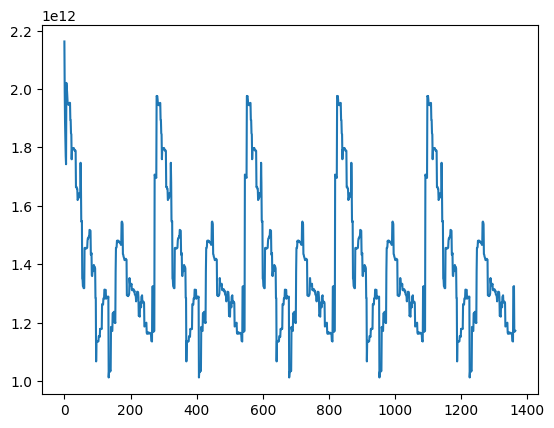

In [267]:
import matplotlib.pyplot as plt
plt.plot(stepi, lossi)

In [268]:
feature[:,10:15].T

tensor([[ 2., 11.,  6.],
        [ 6.,  3.,  8.],
        [ 9., 11.,  9.],
        [ 4.,  8.,  2.],
        [18.,  4.,  6.]])

In [269]:
feature[:,150]

tensor([19., 14., 12.])

In [270]:
label[150]

tensor(2859360.)

In [271]:
model(feature[:,150])

tensor([557644.7500], grad_fn=<ViewBackward0>)